<H1>UNIVERSITIES CLUSTERING</H1>

<H6>Unsupervised Learning<H6>

In [71]:
#Since no parameter is predicted; only a list of college is selected for a client to join

In [118]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [73]:
a=pd.read_csv("https://raw.githubusercontent.com/imhardikj/Universities-Clustering/master/College_Data")
a.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [74]:
a.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [75]:
a=a.rename(columns={'Unnamed: 0':'Names','F.Undergrad':'FullTime','P.Undergrad':'PartTime','Room.Board':'RoomCost','S.F.Ratio':'StuFacRatio','perc.alumni':'Alumni','Grad.Rate':'GradRate'})
a.head()

,Names,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FullTime,PartTime,Outstate,RoomCost,Books,Personal,PhD,Terminal,StuFacRatio,Alumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [76]:
#Private A factor with levels No and Yes indicating private or public university
#Apps Number of applications received
#Accept Number of applications accepted
#Enroll Number of new students enrolled
#Top10perc Pct. new students from top 10% of H.S. class
#Top25perc Pct. new students from top 25% of H.S. class
#F.Undergrad Number of fulltime undergraduates
#P.Undergrad Number of parttime undergraduates
#Outstate Out-of-state tuition
#Room.Board Room and board costs
#Books Estimated book costs
#Personal Estimated personal spending
#PhD Pct. of faculty with Ph.D.’s
#Terminal Pct. of faculty with terminal degree
#S.F.Ratio Student/faculty ratio
#perc.alumni Pct. alumni who donate
#Expend Instructional expenditure per student
#Grad.Rate Graduation rate

In [77]:
a.shape

(777, 19)

In [78]:
a.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,FullTime,PartTime,Outstate,RoomCost,Books,Personal,PhD,Terminal,StuFacRatio,Alumni,Expend,GradRate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [79]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   FullTime     777 non-null    int64  
 8   PartTime     777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  RoomCost     777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  StuFacRatio  777 non-null    float64
 16  Alumni       777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  GradRate     777 non-null    int64  
dtypes: float

<H6>To Check Null<H6>

In [80]:
a.isnull()

,Names,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FullTime,PartTime,Outstate,RoomCost,Books,Personal,PhD,Terminal,StuFacRatio,Alumni,Expend,GradRate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
a.isnull().sum()

Names          0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
FullTime       0
PartTime       0
Outstate       0
RoomCost       0
Books          0
Personal       0
PhD            0
Terminal       0
StuFacRatio    0
Alumni         0
Expend         0
GradRate       0
dtype: int64

<H6>Private<H6>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Private', ylabel='count'>

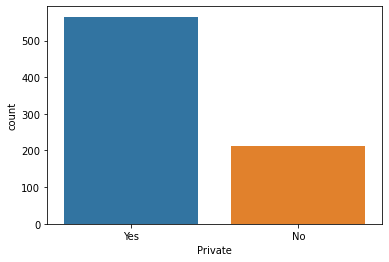

In [82]:
sns.countplot(a.Private)

<H6>Top 10 Percentage<H6>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Top10perc', ylabel='count'>

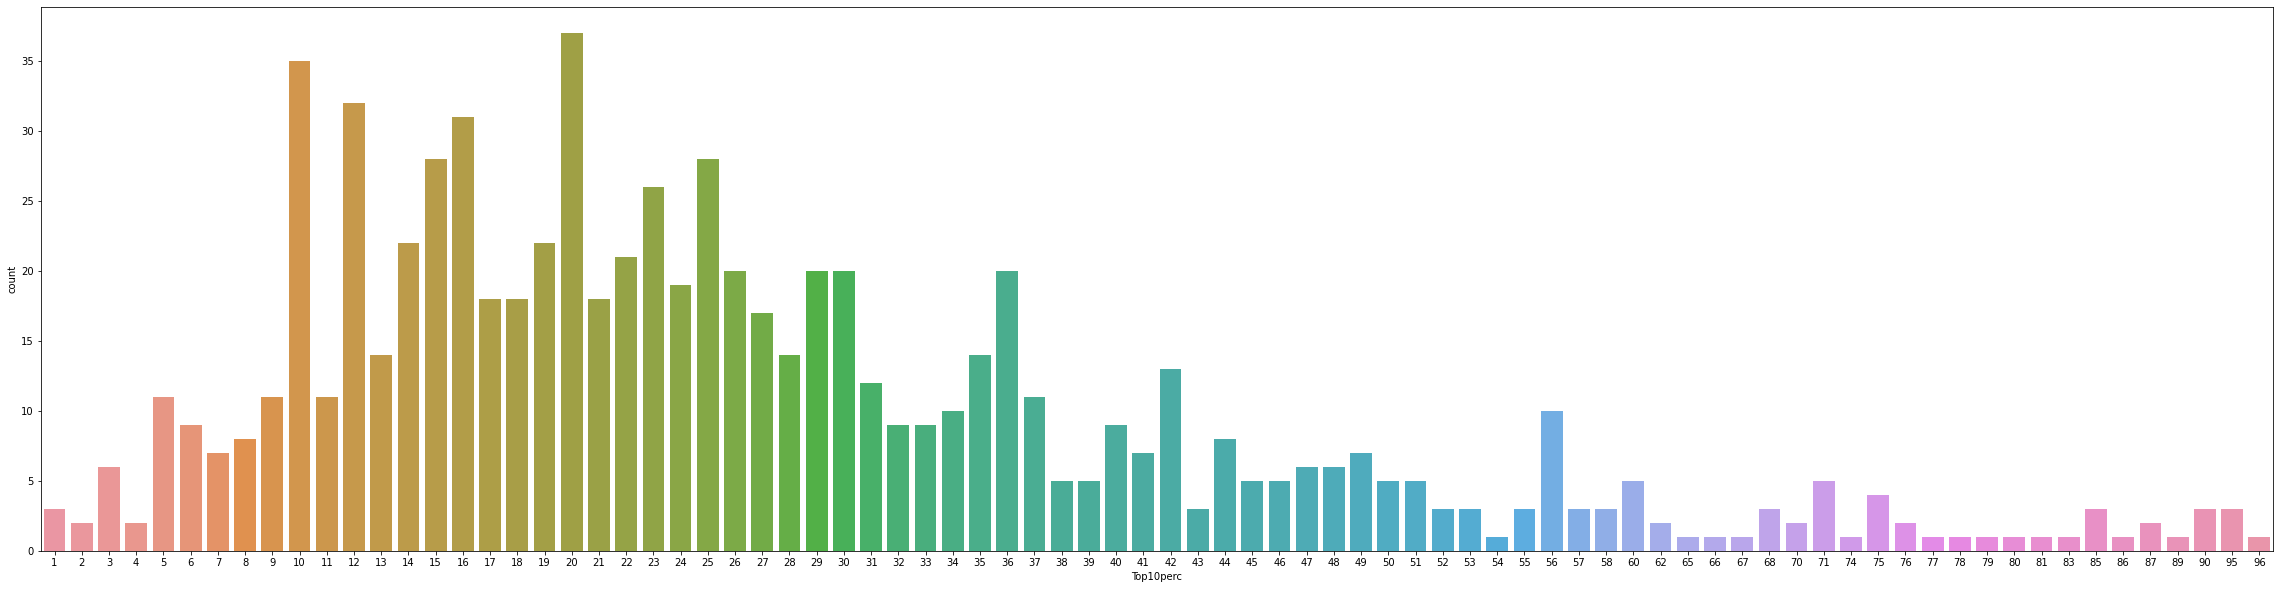

In [83]:
plt.figure(figsize=(40,10))
sns.countplot(a.Top10perc)

<H6>Top 25 Percentage<H6>

C:\Users\SANJAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Top25perc', ylabel='count'>

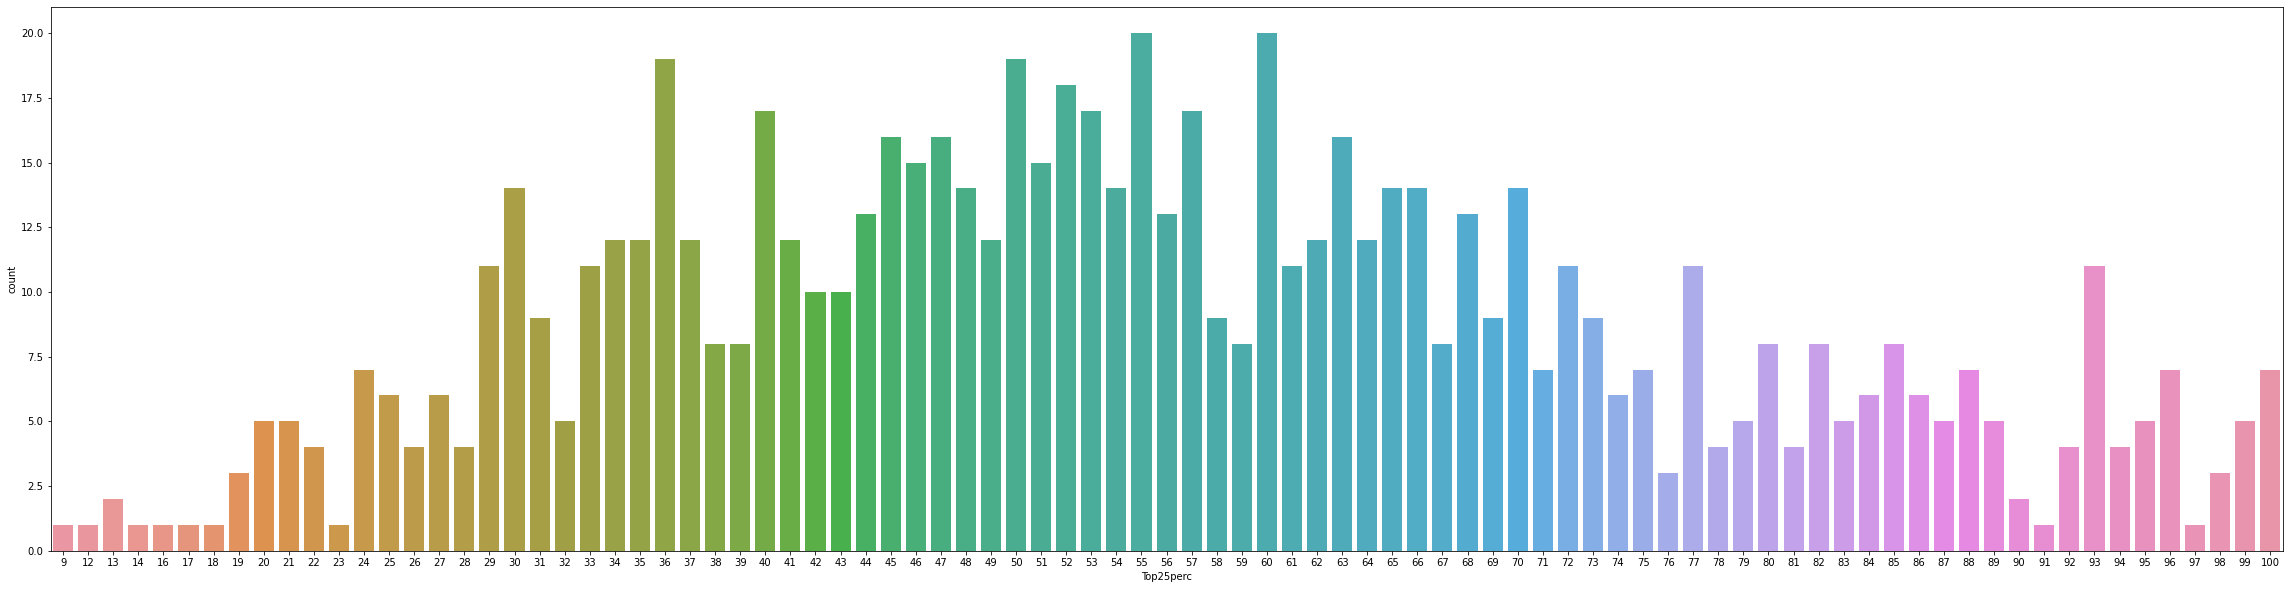

In [84]:
plt.figure(figsize=(40,10))
sns.countplot(a.Top25perc)

<H6>Room Expenditure<H6>

{'whiskers': [<matplotlib.lines.Line2D at 0x20c9cc84550>,
 'caps': [<matplotlib.lines.Line2D at 0x20c9cc84c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c9cc841c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c9cc8e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c9cc8e760>],
 'means': []}

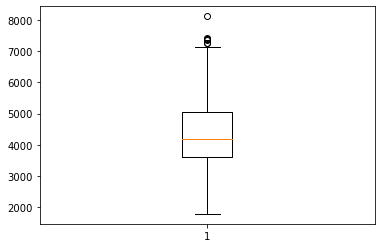

In [85]:
plt.boxplot(a.RoomCost)

<H6>Book Expenditure<H6>

{'whiskers': [<matplotlib.lines.Line2D at 0x20c9ccdbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x20c9cce9670>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c9ccdbb80>],
 'medians': [<matplotlib.lines.Line2D at 0x20c9cce9d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c9ccf7160>],
 'means': []}

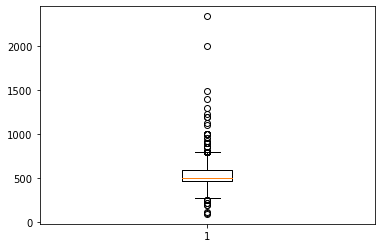

In [86]:
plt.boxplot(a.Books)

<H6>Personal Expenditure<H6>

{'whiskers': [<matplotlib.lines.Line2D at 0x20c9cdf9520>,
 'caps': [<matplotlib.lines.Line2D at 0x20c9cdf9c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c9cdf9190>],
 'medians': [<matplotlib.lines.Line2D at 0x20c9ce073a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c9ce07730>],
 'means': []}

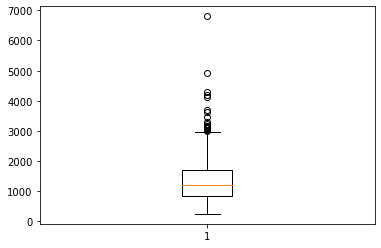

In [87]:
plt.boxplot(a.Personal)

<H6>To find the College with High Graduation<H6>

In [88]:
Column=a['GradRate']
Max_Grad=Column.max()
print(Max_Grad)

118


<H6>To Change GradRate to appropriate Percent<H6>

In [89]:
#Method 1
a.GradRate=a.GradRate.replace(a.GradRate.max(),100)
a.GradRate.max()

100

<H6>To find the College with High Graduation Rate<H6>

In [90]:
a.Names[a.GradRate==a.GradRate.max()]

16                     Amherst College
95                   Cazenovia College
126        College of Mount St. Joseph
238                 Grove City College
250                 Harvard University
251                Harvey Mudd College
317                 Lindenwood College
377    Missouri Southern State College
511             Santa Clara University
522                      Siena College
668             University of Richmond
Name: Names, dtype: object

In [91]:
#Method 2
cQ1=a.GradRate.quantile(0.25)
print(cQ1)
cQ2=a.GradRate.quantile(0.50)
print(cQ2)
cQ3=a.GradRate.quantile(0.75)
print(cQ3)
IQR=cQ3-cQ1
print(IQR)
upper_extreme=cQ3+1.5*cIQR
print(upper_extreme)
lower_extreme=cQ1-1.5*cIQR
print(lower_extreme)

53.0
65.0
78.0
25.0
115.5
15.5


In [92]:
UE=a.GradRate[a.GradRate>upper_extreme]
LE=a.GradRate[a.GradRate<lower_extreme]

In [97]:
data=a.drop(['Names','Private'],axis=1)

In [99]:
data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FullTime',
       'PartTime', 'Outstate', 'RoomCost', 'Books', 'Personal', 'PhD',
       'Terminal', 'StuFacRatio', 'Alumni', 'Expend', 'GradRate'],
      dtype='object')

In [101]:
scaled_data=normalize(data) #data is an array here

In [102]:
scaled_data=pd.DataFrame(scaled_data) #data changes from array to a framed one

In [104]:
print(scaled_data)

           0         1         2         3         4         5         6   \
0    0.143250  0.106316  0.062219  0.001985  0.004487  0.248961  0.046340   
1    0.121541  0.106974  0.028467  0.000890  0.001612  0.149174  0.068221   
2    0.095648  0.073478  0.022506  0.001474  0.003349  0.069392  0.006631   
3    0.017608  0.014737  0.005785  0.002534  0.003758  0.021535  0.002660   
4    0.013744  0.010397  0.003917  0.001139  0.003133  0.017732  0.061882   
..        ...       ...       ...       ...       ...       ...       ...   
772  0.215271  0.148446  0.053205  0.000392  0.002548  0.302673  0.198810   
773  0.121349  0.111809  0.043051  0.001487  0.002911  0.176479  0.068572   
774  0.170141  0.155375  0.056389  0.002759  0.004949  0.226612  0.013468   
775  0.227123  0.052044  0.027942  0.002016  0.002100  0.110687  0.001761   
776  0.325153  0.201793  0.075169  0.003046  0.006853  0.325044  0.187760   

           7         8         9         10        11        12        13  

In [114]:
shc.linkage(scaled_data)

[[3.34000000e+02 7.09000000e+02 1.26665966e-02 2.00000000e+00]
 [5.80000000e+01 5.90000000e+02 1.57435863e-02 2.00000000e+00]
 [3.88000000e+02 5.04000000e+02 1.79086703e-02 2.00000000e+00]
 ...
 [6.03000000e+02 1.54900000e+03 3.01331935e-01 7.75000000e+02]
 [2.80000000e+02 1.55000000e+03 3.53422483e-01 7.76000000e+02]
 [4.83000000e+02 1.55100000e+03 3.64808091e-01 7.77000000e+02]]


In [107]:
scaled_data.columns=data.columns

In [108]:
scaled_data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FullTime',
       'PartTime', 'Outstate', 'RoomCost', 'Books', 'Personal', 'PhD',
       'Terminal', 'StuFacRatio', 'Alumni', 'Expend', 'GradRate'],
      dtype='object')

In [111]:
Ten_rows=scaled_data.head(10)
print(Ten_rows)

       Apps    Accept    Enroll  Top10perc  Top25perc  FullTime  PartTime  \
0  0.143250  0.106316  0.062219   0.001985   0.004487  0.248961  0.046340   
1  0.121541  0.106974  0.028467   0.000890   0.001612  0.149174  0.068221   
2  0.095648  0.073478  0.022506   0.001474   0.003349  0.069392  0.006631   
3  0.017608  0.014737  0.005785   0.002534   0.003758  0.021535  0.002660   
4  0.013744  0.010397  0.003917   0.001139   0.003133  0.017732  0.061882   
5  0.034483  0.028139  0.009282   0.002232   0.003642  0.039829  0.002409   
6  0.020698  0.019936  0.006039   0.000997   0.002639  0.024392  0.013486   
7  0.100384  0.090922  0.025849   0.001956   0.003595  0.084261  0.001692   
8  0.051810  0.041878  0.011330   0.001497   0.003145  0.048566  0.015274   
9  0.040473  0.034631  0.011961   0.001460   0.003060  0.055563  0.005424   

   Outstate  RoomCost     Books  Personal       PhD  Terminal  StuFacRatio  \
0  0.642036  0.284774  0.038833  0.189849  0.006041  0.006731     0.001562

In [116]:
link=shc.linkage(Ten_rows)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [55.0, 55.0, 80.0, 80.0],
  [45.0, 45.0, 67.5, 67.5],
  [35.0, 35.0, 56.25, 56.25],
  [25.0, 25.0, 45.625, 45.625],
  [10.0, 10.0, 35.3125, 35.3125]],
 'dcoord': [[0.0, 0.12086278215441965, 0.12086278215441965, 0.0],
  [0.0, 0.04508128413722419, 0.04508128413722419, 0.0],
  [0.0, 0.05113213357563551, 0.05113213357563551, 0.0],
  [0.04508128413722419,
   0.09022784273099921,
   0.09022784273099921,
   0.05113213357563551],
  [0.0, 0.09988149460125453, 0.09988149460125453, 0.09022784273099921],
  [0.0, 0.15160141290228824, 0.15160141290228824, 0.09988149460125453],
  [0.0, 0.15782475575373076, 0.15782475575373076, 0.15160141290228824],
  [0.0, 0.17622749126367518, 0.17622749126367518, 0.15782475575373076],
  [0.12086278215441965,
   0.2628289165315877,
   0.2628289165315877,
   0.17622749126367518]],
 'ivl': ['3', '4', '0', '1', '6', '9', '5', '8', '2', '7'],
 'leaves

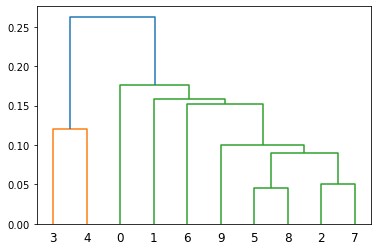

In [117]:
shc.dendrogram(link) #for ten rows alone

In [127]:
cluster=AgglomerativeClustering(n_clusters=3).fit(link)
print(cluster)

AgglomerativeClustering(n_clusters=3)


In [128]:
 c=cluster.labels_
clustering=pd.DataFrame(c)

In [130]:
model=pd.concat([a.Names,clustering,data],axis=1)
model.head(10)

,Names,0,Apps,Accept,Enroll,Top10perc,Top25perc,FullTime,PartTime,Outstate,RoomCost,Books,Personal,PhD,Terminal,StuFacRatio,Alumni,Expend,GradRate
0,Abilene Christian University,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,0.0,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,2.0,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,2.0,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,0.0,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,NaN,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


<H6>To make a Excel or CSV file<H6>

In [131]:
model.to_excel

<bound method NDFrame.to_excel of                               Names    0   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University  1.0   1660    1232     721         23   
1                Adelphi University  1.0   2186    1924     512         16   
2                    Adrian College  0.0   1428    1097     336         22   
3               Agnes Scott College  0.0    417     349     137         60   
4         Alaska Pacific University  1.0    193     146      55         16   
..                              ...  ...    ...     ...     ...        ...   
772         Worcester State College  NaN   2197    1515     543          4   
773               Xavier University  NaN   1959    1805     695         24   
774  Xavier University of Louisiana  NaN   2097    1915     695         34   
775                 Yale University  NaN  10705    2453    1317         95   
776    York College of Pennsylvania  NaN   2989    1855     691         28   

     Top25perc  FullTime  Par

In [135]:
model.to_csv("E:\Jupyter NB\data.csv") #to create a file